<a href="https://colab.research.google.com/github/dcpetit/Astronomy/blob/main/Thesis_data_plots_SNRatioPynPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Plot the data obtained from the S/N tables generated from PynPoint

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd
import numpy as np
import scipy.io
from astropy.io import fits
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
font = {#'family' : 'normal',
        #'color' : 'white',
        #'weight' : 'bold',
        'size'   : 11}                          
plt.rc('font', **font)
#path = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2020-02-08_results/' ###
path = '/content/drive/MyDrive/thesis_masters/2020-02-08_results/'
#file = 'SNR_FormattedByHand.csv'
#fileGood = 'ff_variable-table_to_file.txt'
file2= 'ff_variable-table_properties.txt'
# file2's contents are: (3, 3, 39, 200, 200)

#df = pd.read_csv(path+file, header=None)#, sep=',') # Now obsolete...?
#df = np.load(path+'ff_variable-table_to_file.npy')

#df = np.load('/content/drive/MyDrive/thesis_masters/2020-02-08_results/ff_variable-table_to_file.npy')
df2 = np.load('/content/drive/MyDrive/thesis_masters/2020-02-08_results/ff_variable-table_to_file_SADI_123123.npy')
#df3 = np.load('/content/drive/MyDrive/thesis_masters/2020-02-08_results/ff_variable-table_to_file_ASDI_123123.npy')
#df4 = np.load('/content/drive/MyDrive/thesis_masters/2020-02-08_results/ff_variable-table_to_file_CODI_100.npy')
df = df2
#print(df)

In [51]:
# extract number of images taken in an observation (angles fits file) to calculate Model Completenesses
fits_FilePathFolder = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2020-02-08_results/'  ########
fits_FilePath = fits_FilePathFolder+'angles.fits'
fits_FilePath  = '/content/drive/MyDrive/thesis_masters/2020-02-08_results/angles.fits'
#fits_FilePath = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/51Eri_28Nov2019/data.fits' #####
#print(fits_FilePath)
fits_image_filename = fits.open(fits_FilePath)
print(fits_image_filename.info())
print('\n', fits_image_filename)
#print('\n', fits_image_filename.info(0))
#print(fits_image_filename.info(0)[0][4]) # this is value of 'cards' (5, this time)
print('\n', fits_image_filename.info(0)[0][5][0]) # this is dimensions/number of exposures/images 
#print('\n', fits_image_filename[0].data)
#print('the length of the header is', len(fits_image_filename[0].header))
print('\n', fits_image_filename[0].header)
#print(fits_image_filename.info(0)[0][5][2])
#print(fits_image_filename.info(0)[0][5][3])
                                                    #hdul = fits.open(fits_image_filename)
N_tot_lambda = int(fits_image_filename.info(0)[0][5][0])
PC_max_SDI = 39-1 #or is it 38?
PC_max_ADI = N_tot_lambda - 1 # = the number of images - 1
PC_max_SADI = 39-1
PC_max_ASDI = 10 # WHAT IS THIS ONE????????????????????????????????????????????????????
PC_max_CODI = (N_tot_lambda*39) - 1 # = PC_max_ADI * PC_max_SDI

Filename: /content/drive/MyDrive/thesis_masters/2020-02-08_results/angles.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (32,)   float64   
None


 32

 SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    1 / number of array dimensions                     NAXIS1  =                   32                                                  EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                              

In [52]:
# Use ADI_wave_median.fits to access data... it should have a large 200x200x39xpca1xpca2 matrix.
# Then plot it with code below 

image_file = '/content/drive/MyDrive/thesis_masters/2020-02-08_results/ADI_wave_median.fits'
fits_image_filename = fits.open('/content/drive/MyDrive/thesis_masters/2020-02-08_results/ADI_wave_median.fits')

fits.info(image_file)
image_data = fits.getdata(image_file, ext=0) 
#image_data = fits.getdata(fits_image_filename, ext=0) 


# The data is now stored as a 2D numpy array. Print the dimensions using the shape attribute:

print(image_data.shape)
#print('finding 200 x values', image_data[0][0][0])
print('finding the signal strength in pixel (0,0):', image_data[0][0][0][195])
x, y = image_data[0][0][0], image_data[0][0][1]
print('length of x and y are,', len(x), len(y))


#print('\n', len(fits_image_filename[0].data))
#print('sum is,', np.sum(fits_image_filename[0].data))
#print('\n', fits_image_filename[0].data)

signalMatrix = np.zeros(200*200).reshape(200,200)
#print(signalMatrix)
for i in range(len(x)):
    for j in range(len(y)):
        #print('i and j are:\n', i, j)
        signalMatrix[i][j] = image_data[0][32][i][j]
print('The maximum signal in this matrix is:', round(max(signalMatrix.ravel()),2))
for i in (range(len(signalMatrix.ravel()))):
    if (signalMatrix.ravel()[i]) > 7.44:
        ravelIndex = i
print('The location of the max is:', np.unravel_index(ravelIndex,(200,200)))

Filename: /content/drive/MyDrive/thesis_masters/2020-02-08_results/ADI_wave_median.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   (200, 200, 39, 1)   float64   
(1, 39, 200, 200)
finding the signal strength in pixel (0,0): 0.0
length of x and y are, 200 200
The maximum signal in this matrix is: 7.45
The location of the max is: (137, 78)


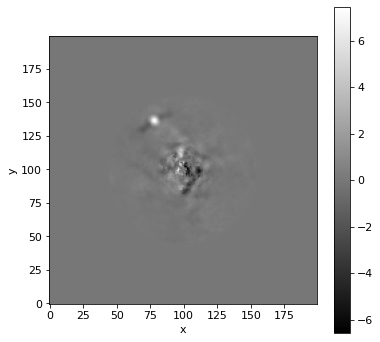

In [53]:
plt.figure(figsize=(6,6)) 
#plt.imshow(image_data, cmap='gray') 
plt.imshow(signalMatrix, cmap='gray', origin='lower') # 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic
plt.xlabel('x'), plt.ylabel('y')
plt.colorbar()

In [54]:
#df2= pd.read_table(path+file2, header=None, delimiter=',') # delimiter={',', '(', ')'}
df2 = pd.DataFrame([3, 3, 39, 200, 200])
'''
PCAs1 = int(df2[0][0][1])
PCAs2 = int(df2[1][0])
wavelength_index = int(df2[2][0])
'''
PCAs1 = df2[0][0]
PCAs2 = df2[0][1]
wavelength_index = df2[0][2]

# A for loop to organize the data_frame into a plotable SNRatios
SN_table = np.zeros( ( PCAs1, PCAs2, wavelength_index ), dtype=float, order='C') #print(SN_table)
model_completeness = np.zeros( ( PCAs1, PCAs2, 2 ), dtype=float, order='C')
#print('the SN table is \n', SN_table)
bad_character = [ '[', ' ', ',', ']' ]
# (i+1)/(39-1) is for SDI
# (j+1)/(N_tot_lambda - 1) is for ADI
for i in range(3): 
    for j in range(3):
        for k in range(39): # 39 rows in the file/data
            SN_table[i, j, k] = df[i][j][k]
            model_completeness[i, j, :] = [(i+1)/(N_tot_lambda - 1), (j+1)/(39-1)] # for ASDI          

print(model_completeness[1,1])
print('\n\n', model_completeness)
print('\n\n', SN_table[0][0][0])
print('\n\n', SN_table[0][0])
#print('\n\n', SN_table[0])
#print('\n\n', SN_table)

# For now, take the Max(SNR) for each PCA, use that. Later, use the whole function of SNRs
# Can then make heat maps: techniques vs. max(SNR)... x:adi y:sdi
# Use all of the 4 Beta Pic observations


[0.06451613 0.05263158]


 [[[0.03225806 0.02631579]
  [0.03225806 0.05263158]
  [0.03225806 0.07894737]]

 [[0.06451613 0.02631579]
  [0.06451613 0.05263158]
  [0.06451613 0.07894737]]

 [[0.09677419 0.02631579]
  [0.09677419 0.05263158]
  [0.09677419 0.07894737]]]


 -4.659328154979236


 [ -4.65932815  -8.61051318 -17.72655154 -23.74864945 -33.08358351
 -28.51637207 -28.27481286 -15.00124999  -0.19063982   3.64209562
   9.58682335  16.19873744  27.14085196  53.3929249   64.70277365
  29.84195748   8.645482    -8.75946443 -16.31060176 -10.9557485
 -14.67101145  -7.31740785 -11.51715372 -11.80017736  -8.15900562
   0.89005924   3.32942427  10.54302473  20.90220895  40.12071177
  65.42606278  95.24696569 143.41036802 156.63824392 129.18122972
 123.95878951  66.66086282  22.23549558   4.21027357]


In [55]:
# Color spectra used for plots
clrs = ['brown', 'maroon', 'red', 'tomato', 'coral', 'darkorange', 'tan', 'orange', 'wheat', 'gold', 'darkkhaki', 'lightyellow', 'olive', 'yellow', 'yellowgreen', 'chartreuse', 'darkseagreen', 'lightgreen', 'forestgreen', 'lime', 'springgreen', 'aquamarine', 'lightseagreen', 'lightcyan', 'teal', 'darkcyan', 'cyan', 'skyblue', 'slategray', 'royalblue', 'navy', 'slateblue', 'blue', 'mediumpurple', 'blueviolet', 'indigo', 'darkviolet', 'thistle', 'plum', 'purple', 'magenta', 'deeppink', 'crimson', 'pink']
greens = ['#88ff6b', '#7bff5b', '#6aff45', '#58ff30', '#45ff18', '#32ff00', '#28cf00', '#21ac00', '#1c8f00', '#167000', '#0f5000', '#092d00', '#031200']

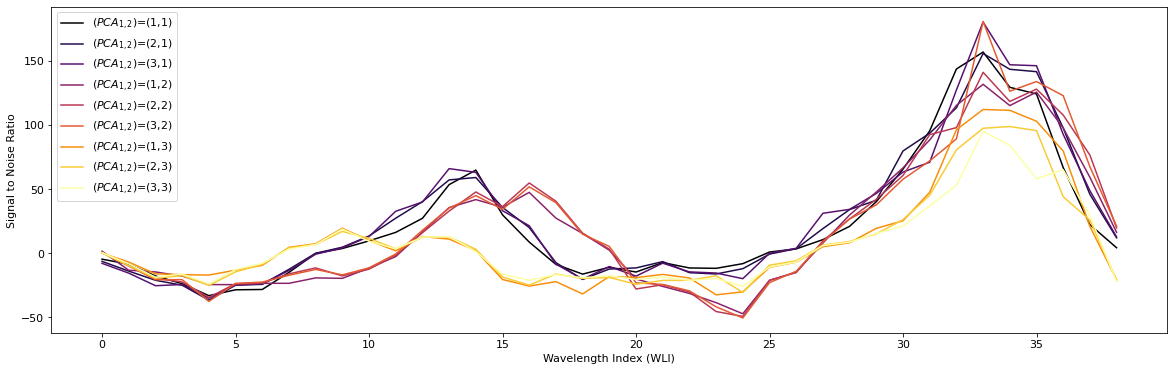

In [74]:
# Plot things #1: Signal to Noise ratio vs wavelength index, for various PCAs
p = plt.get_cmap('inferno') 
plt.figure(figsize = (20, 6))
wavelength_index = range(len(SN_table[0][0]))
counter_color = 0
for j in range(3):       # switch back to i then j! 
    for i in range(3):
        plt.plot(wavelength_index, SN_table[j][i], color=p(counter_color/((3*3)-1)), label='($PCA_{1,2}$)=('+str(i+1)+','+str(j+1)+')') ###
        #plt.plot(wavelength_index, SN_table[j][i], color=clrs[3*i+j], label='($PCA_{1,2}$)=('+str(i+1)+','+str(j+1)+')') ###
        #plt.plot(rad, sig, linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
        counter_color += 1
plt.xlabel('Wavelength Index (WLI)')
plt.ylabel('Signal to Noise Ratio')
plt.legend()

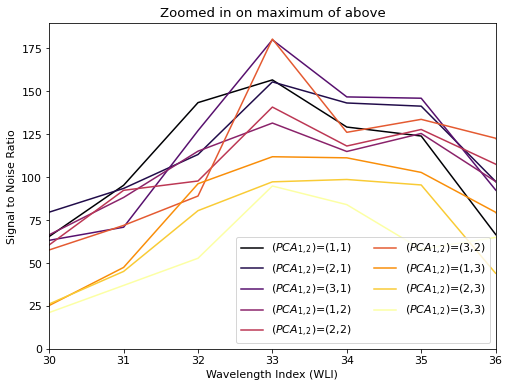

In [80]:
# Plot things #1: Signal to Noise ratio vs wavelength index, for various PCAs
p = plt.get_cmap('inferno') 
plt.figure(figsize = (8, 6))
wavelength_index = range(len(SN_table[0][0]))
counter_color = 0
for j in range(3):       # switch back to i then j! 
    for i in range(3):
            plt.plot(wavelength_index, SN_table[j][i], color=p(counter_color/((3*3)-1)), label='($PCA_{1,2}$)=('+str(i+1)+','+str(j+1)+')') ###
            counter_color += 1
plt.xlabel('Wavelength Index (WLI)')
plt.ylabel('Signal to Noise Ratio')
plt.title('Zoomed in on maximum of above')
plt.xlim(30,36)
plt.ylim(0,190)
plt.legend(ncol=2)

In [57]:
# Plot things #2: Constant PCA1, plot PCA2 on varying wavelenths; constant PCA2, plot PCA1 on varying wavelenths
#        plt.plot(wavelength_index, PCA2, label='PCA_1=1')
#        plt.plot(wavelength_index, PCA1, label='PCA_2=1')

[-4.659328154979236, -6.393861014674623, -7.916866898192044, 1.5085184800483462, 0.5229445921229955, 0.48800442316700987, 0.08029888501793456, 0.20759713092261184, 0.4483434745686332]
[0.1 0.1 0.1 0.2 0.2 0.2 0.3 0.3 0.3]


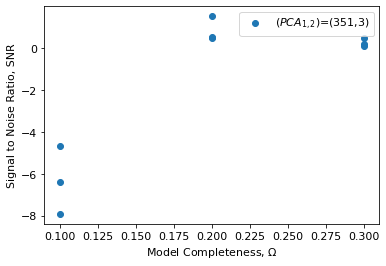

In [58]:
# Plot things #3 (research's goal): sdi residual shape
PC_max = PC_max_ASDI
PC_used= []
for i in range(3):
    for j in range(3):
        #print(i+1,j+1)
        PC_used.append([i+1, j+1])
#print(PC_used)
#PC_used = len(SN_table[j][i])    #evaluate(pipeline, 'ADI+SDI', ([1,2,3], [1,2,3]))
                                # ((1,1) (1,2) (1,3))
                                # ((2,1) (2,2) (2,3)) 
                                 # Do I need many observations now? Or just use the sum of the i+j column as te number of pcas used?

model_completeness = np.array(np.divide(PC_used, PC_max))
first_element_of_nine_arrays = []
for i in range(len(SN_table.flatten())):
    #print(i)
    if i % 39 == 0:
        #print(SN_table.flatten()[i])
        first_element_of_nine_arrays.append(SN_table.flatten()[i])
print(first_element_of_nine_arrays)
#print(model_completeness)
print(model_completeness[:,0])
#print(SN_table)
plt.plot(model_completeness[:,0], first_element_of_nine_arrays, 'o', label='($PCA_{1,2}$)=('+str(i+1)+','+str(j+1)+')') # , color=clrs[3*i+j]
plt.xlabel('Model Completeness, $\Omega$')
plt.ylabel('Signal to Noise Ratio, SNR')
plt.legend()


[[156.63824392 131.50435424 111.88641894]
 [155.4838385  140.81668753  98.63489903]
 [179.98210365 180.43991649  94.83436387]]


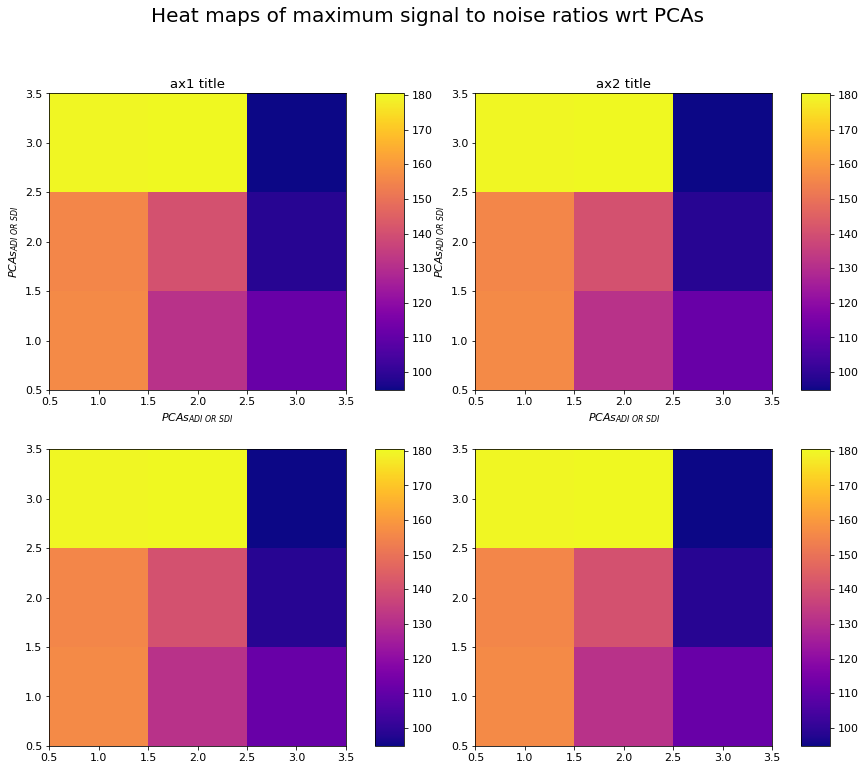

'\n# From stack overflow:\na = np.random.random((16, 16))\n#plt.imshow(a, cmap=\'hot\', interpolation=\'nearest\')\n#plt.show()\nfig = plt.figure()\ngrid = AxesGrid(fig, 111,\n                nrows_ncols=(2, 2),\n                axes_pad=0.05,\n                share_all=True,\n                label_mode="L",\n                cbar_location="right",\n                cbar_mode="single",\n                )\nfor val, ax in zip(a,grid):\n    #im = ax.imshow(val, vmin=0, vmax=1)\n    im = ax.imshow(a, cmap=\'hot\', interpolation=\'nearest\')\ngrid.cbar_axes[0].colorbar(im)\nfor cax in grid.cbar_axes:\n    cax.toggle_label(False)\n'

In [59]:
# Plot heat maps of average Signal-to-Noise Ratios for the varied PCAs (14 Jun - getting formatting right)
from mpl_toolkits.axes_grid1 import AxesGrid
plt.rcParams["axes.grid"] = False #removes white line-grid 
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

# if feasible, use a command in imshow to flip the axis so origin is in bottom left


wavelength_index = range(len(SN_table[0][0]))
max_signal_strength = np.zeros( ( PCAs1, PCAs2 ), dtype=float, order='C')
for i in range(3):
    for j in range(3):
        max_signal_strength[i,j] = (max(SN_table[j][i]))
        # wavelength_index, SN_table[j][i]
print(max_signal_strength) 
a = pd.DataFrame(max_signal_strength)       # a = np.random.random((8, 8))
# b = ... c=... d=...
data = pd.DataFrame([[a],[a],[a],[a]]) # this will be pcas, with [a],[b],[c],[d] 

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize = (14,12) ) 
ax = [ax1, ax2, ax3, ax4] # for i in range(4): ax[i]?
fig.suptitle('Heat maps of maximum signal to noise ratios wrt PCAs', fontsize=20)
for i in range(len(data)):
    image = ax[i].imshow(data[0][i], cmap='plasma', origin='lower', extent=[0.5,0.5+int(len(a)),0.5,int(len(a))+0.5], rasterized=True)
    divider=make_axes_locatable(ax[i])
    cax = divider.append_axes('right', size='10%', pad=0.4)
    cbar= fig.colorbar(image, cax=cax)
#ticks = ['1','2','3']
#ax1.set_xticks([0,1,2])
ax1.set_xlabel('$PCAs_{ADI\ OR\ SDI}$')
ax1.set_ylabel('$PCAs_{ADI\ OR\ SDI}$')
ax1.set_title('ax1 title')
#ax2.set_xticks([1,2,3])
ax2.set_xlabel('$PCAs_{ADI\ OR\ SDI}$')
ax2.set_ylabel('$PCAs_{ADI\ OR\ SDI}$')
ax2.set_title('ax2 title')
plt.show()

'''
im1 = ax1.imshow(data[0][0], cmap='plasma', origin='lower', interpolation='nearest', rasterized=True)
divider1 = make_axes_locatable(ax1) 
cax1 = divider1.append_axes("right", size="10%", pad=0.4)
cbar1 = fig.colorbar(im1, cax=cax1)
im2 = ax2.imshow(data[0][1], cmap='plasma', origin='lower', interpolation='nearest', rasterized=True)
divider2 = make_axes_locatable(ax2) 
cax2 = divider2.append_axes("right", size="10%", pad=0.4)
cbar2 = fig.colorbar(im2, cax=cax2)
im3 = ax3.imshow(data[0][2], cmap='plasma', origin='lower', interpolation='nearest', rasterized=True)
divider3 = make_axes_locatable(ax3) 
cax3 = divider3.append_axes("right", size="10%", pad=0.4)
cbar3 = fig.colorbar(im3, cax=cax3)
im4 = ax4.imshow(data[0][3], cmap='plasma', origin='lower', interpolation='nearest', rasterized=True)
divider4 = make_axes_locatable(ax4) 
cax4 = divider4.append_axes("right", size="10%", pad=0.4)
cbar4 = fig.colorbar(im4, cax=cax4)
'''

'''
# From stack overflow:
a = np.random.random((16, 16))
#plt.imshow(a, cmap='hot', interpolation='nearest')
#plt.show()
fig = plt.figure()
grid = AxesGrid(fig, 111,
                nrows_ncols=(2, 2),
                axes_pad=0.05,
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single",
                )
for val, ax in zip(a,grid):
    #im = ax.imshow(val, vmin=0, vmax=1)
    im = ax.imshow(a, cmap='hot', interpolation='nearest')
grid.cbar_axes[0].colorbar(im)
for cax in grid.cbar_axes:
    cax.toggle_label(False)
'''

In [60]:
'''
# Put this in the first cell eventually...
path_2018 = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2018-12-15_results/' ###
file_2018 = 'SNR_FormattedByHand.csv'
#file_2018 = 'ff_variable-table_to_file.txt'
file2_2018= 'ff_variable-table_properties.txt'

path_2016 = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2016-11-18_results/' ###
file_2016 = 'SNR_FormattedByHand.csv'
#file_2016 = 'ff_variable-table_to_file.txt'
file2_2016= 'ff_variable-table_properties.txt'

path_2015 = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2015-11-30_results/' ###
file_2015 = 'SNR_FormattedByHand.csv'
#file_2015 = 'ff_variable-table_to_file.txt'
file2_2015= 'ff_variable-table_properties.txt'

df_2018 = pd.read_csv(path_2018+file, header=None) #change file name?
df_2016 = pd.read_csv(path_2016+file, header=None)
df_2015 = pd.read_csv(path_2015+file, header=None)

df2_2018= pd.read_table(path_2018+file2, header=None, delimiter=',')
df2_2016= pd.read_table(path_2016+file2, header=None, delimiter=',')
df2_2015= pd.read_table(path_2015+file2, header=None, delimiter=',')

PCAs1_2018 = int(df2_2018[0][0][1])
PCAs1_2016 = int(df2_2016[0][0][1])
PCAs1_2015 = int(df2_2015[0][0][1])

PCAs2_2018 = int(df2_2018[1][0])
PCAs2_2016 = int(df2_2016[1][0])
PCAs2_2015 = int(df2_2015[1][0])

wavelength_index_2018 = int(df2_2018[2][0])
wavelength_index_2016 = int(df2_2016[2][0])
wavelength_index_2015 = int(df2_2015[2][0])

SN_table_2018 = np.zeros( ( PCAs1_2018, PCAs2_2018, wavelength_index_2018 ), dtype=float, order='C')
SN_table_2016 = np.zeros( ( PCAs1_2016, PCAs2_2016, wavelength_index_2016 ), dtype=float, order='C')
SN_table_2015 = np.zeros( ( PCAs1_2015, PCAs2_2015, wavelength_index_2015 ), dtype=float, order='C')

for i in range(11): # 11 columns in the file
    for k in range(39): # 39 rows in the file
        if i == 0 or i == 1 or i == 2:
            SN_table_2018[i, 0, k] = df_2018[i][k]     # print('df_2018[i][k] is:', df_2018[i][k])
            SN_table_2016[i, 0, k] = df_2016[i][k]
            SN_table_2015[i, 0, k] = df_2015[i][k]
        elif i == 4 or i == 5 or i == 6:
            SN_table_2018[i-4, 1, k] = df_2018[i][k]
            SN_table_2016[i-4, 1, k] = df_2016[i][k]
            SN_table_2015[i-4, 1, k] = df_2015[i][k]
        elif i == 8 or i == 9 or i == 10:
            SN_table_2018[i-8, 2, k] = df_2018[i][k]
            SN_table_2016[i-8, 2, k] = df_2016[i][k]
            SN_table_2015[i-8, 2, k] = df_2015[i][k]
        #else:
            #print('i != 0,1,2, 4,5,6, 8,9,10')
#print(SN_table[0][0])
'''


"\n# Put this in the first cell eventually...\npath_2018 = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2018-12-15_results/' ###\nfile_2018 = 'SNR_FormattedByHand.csv'\n#file_2018 = 'ff_variable-table_to_file.txt'\nfile2_2018= 'ff_variable-table_properties.txt'\n\npath_2016 = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2016-11-18_results/' ###\nfile_2016 = 'SNR_FormattedByHand.csv'\n#file_2016 = 'ff_variable-table_to_file.txt'\nfile2_2016= 'ff_variable-table_properties.txt'\n\npath_2015 = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2015-11-30_results/' ###\nfile_2015 = 'SNR_FormattedByHand.csv'\n#file_2015 = 'ff_variable-table_to_file.txt'\nfile2_2015= 'ff_variable-table_properties.txt'\n\ndf_2018 = pd.read_csv(path_2018+file, header=None) #change file name?\ndf_2016 = pd.read_csv(path_2016+file, header=None)\ndf_2015 = pd.read_csv(path_2015+file, header

In [61]:
'''

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,8))
fig.suptitle('Signal to Noise Ratios on Waveindex Number for 3 Observations')
for i in range(3):
    for j in range(3):
        ax1.plot(range(len(SN_table_2018[0][0])), SN_table_2018[j][i], color=clrs[3*i+j], label='($PCA_{2018: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###
        ax2.plot(range(len(SN_table_2016[0][0])), SN_table_2016[j][i], color=clrs[3*i+j], label='($PCA_{2016: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###
        ax3.plot(range(len(SN_table_2015[0][0])), SN_table_2015[j][i], color=clrs[3*i+j], label='($PCA_{2015: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###     
        
        # a = np.empty(9)
        # a[j] = i
        # ax.plot(range(9), a, color=greens[i], label='$green_{'+str(i)+'}$')
        
ax1.set_ylim([-4, 5.2])
ax2.set_ylim([-4, 5.2])
ax3.set_ylim([-4, 5.2])
ax2.set_ylabel('Signal to Noise Ratio') #ax1.set_ylabel('Signal to Noise Ratio')
ax3.set_xlabel('Wavelength Index Number (WLI)')
ax1.set_title('2018', fontsize=10)
ax2.set_title('2016', fontsize=10)
ax3.set_title('2015', fontsize=10)
ax1.legend()
ax2.legend()
ax3.legend()
'''

"\n\nfig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,8))\nfig.suptitle('Signal to Noise Ratios on Waveindex Number for 3 Observations')\nfor i in range(3):\n    for j in range(3):\n        ax1.plot(range(len(SN_table_2018[0][0])), SN_table_2018[j][i], color=clrs[3*i+j], label='($PCA_{2018: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###\n        ax2.plot(range(len(SN_table_2016[0][0])), SN_table_2016[j][i], color=clrs[3*i+j], label='($PCA_{2016: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###\n        ax3.plot(range(len(SN_table_2015[0][0])), SN_table_2015[j][i], color=clrs[3*i+j], label='($PCA_{2015: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###     \n        \n        # a = np.empty(9)\n        # a[j] = i\n        # ax.plot(range(9), a, color=greens[i], label='$green_{'+str(i)+'}$')\n        \nax1.set_ylim([-4, 5.2])\nax2.set_ylim([-4, 5.2])\nax3.set_ylim([-4, 5.2])\nax2.set_ylabel('Signal to Noise Ratio') #ax1.set_ylabel('Signal to Noise Ratio')\nax3.set_xlabel('Wavelength Index Number (WLI)')\n

X_profile_min:  0
X_profile_max:  200


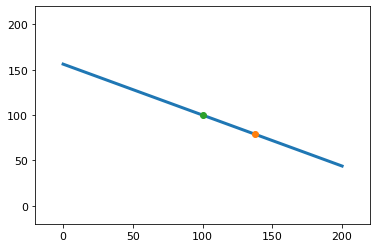

X_profile_min:  73.11827956989248
X_profile_max:  126.88172043010752


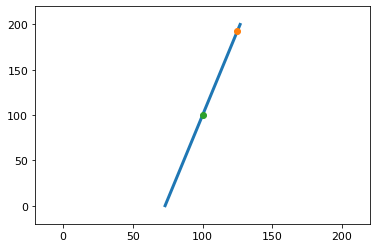

len of boxes is:
 1000
len of numpy unique boxes is:
 293
len of boxes is:
 1000
len of numpy unique boxes is:
 244
length of input: 293
CrossSSig Max is:  7.452111468553884
CrossSSig Max's location is:  201
length of input: 244
CrossSSig Max is:  5.887187523674381
CrossSSig Max's location is:  118


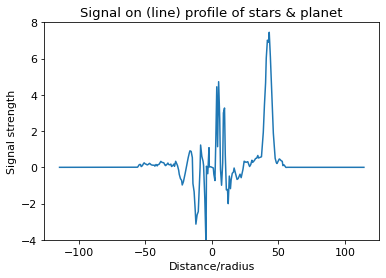

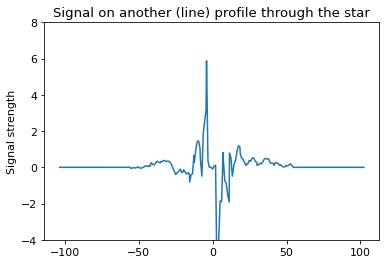

In [62]:
# Determine which pixels are along the line between the star and the planet.
# An ADI image in ds9 suggests: bottom left is origin (0,0), and the top right is (200,200)

#signalMatrix =  # the large matrix of signal strength from the data reduction (image in numbers)
FieldOfView_X = 200 # from the image outputs or from Sven
FieldOfView_Y = 200 # from the image outputs or from Sven
Xcen, Ycen = 137.65, 78.82 #actually Xcen=78.82,Ycen=137.65... # the x & y coordinates are switched 
test_Xcen, test_Ycen = 125, 193 # 25, 40
def inputCenter_outputPlot(XCen, YCen):
    pixelSize = 1 # from the image outputs or from Sven
    signalCenter = [XCen, YCen] # from the data reduction's code, or from visual inspection
    m = ((YCen-100)/(XCen-100))
    X_profile_max = (XCen/YCen)*FieldOfView_Y # calculated while assuming the star was at the origin. Otherwise use = ((Xcen-Xstar)/(Ycen-Ystar))*FieldOfView_Y
    if abs(m) > 1:
        X_prof_min_buffer = 100*(1 - (1/abs(m)))
        X_prof_max_buffer = 100*(1 + (1/abs(m))) #abs(m)?
        Y_prof_min_buffer = 0
        Y_prof_max_buffer = 0
        X_profile_min = 0 + X_prof_min_buffer #(Xcen/Ycen)*FieldOfView_Y
        X_profile_max = 200 - X_prof_min_buffer #(Xcen/Ycen)*FieldOfView_Y
    else:
        Y_prof_min_buffer = 100*(1 - (1/abs(m))) #abs(m)?
        Y_prof_max_buffer = 100*(1 + (1/abs(m))) #abs(m)?
        X_prof_min_buffer = 0
        X_prof_max_buffer = 0
        X_profile_min = 0 + X_prof_min_buffer #(Xcen/Ycen)*FieldOfView_Y
        X_profile_max = 200 - X_prof_max_buffer #(Xcen/Ycen)*FieldOfView_Y
    print('X_profile_min: ', X_profile_min)
    print('X_profile_max: ', X_profile_max)
    xComponent = np.linspace(X_profile_min, X_profile_max, 1000) #maybe more than 1000
    yComponent = YCen + m*(xComponent - XCen)
    #print('x is: '+str(xComponent)+'.\n\ny is: '+str(yComponent)) # Test: should be values that start and end between 0 and 200
    plt.plot(xComponent, yComponent, '-', linewidth=3)
    plt.plot(XCen, YCen, 'o')
    plt.plot(100, 100, 'o')
    plt.xlim(-20,220)
    plt.ylim(-20,220)
    plt.show()
    return(xComponent, m)
xComponent, m  = inputCenter_outputPlot(Xcen, Ycen)
testX, testm = inputCenter_outputPlot(test_Xcen, test_Ycen)
radiusArray = [] # or rename this "pixelPath"

# This approach determines in which pixel each point on the line is in, and then removes the many redundant pixels
def pixels_under_the_star_planet_line(Xcen, Ycen, xComponent, m):
    boxes = []
    for i in xComponent:
        xCoord = i
        yCoord = Ycen + m*(i - Xcen) #slope of the line equation (Ycen + m*(i-Xcen))???
        boxes.append([int(xCoord), int(yCoord)])
        #print('all boxes are:\n', boxes)
    unique_boxes = []
    for i in boxes:
        if i not in unique_boxes:
            unique_boxes.append(i)
    UniqueBoxesNP = np.array(unique_boxes)
    #print('numpy unique boxes are:\n', UniqueBoxesNP)
    print('len of boxes is:\n', len(boxes)) # should be the number of points in the np.linspace command 
    print('len of numpy unique boxes is:\n', len(UniqueBoxesNP))
    return(UniqueBoxesNP)
UniqueBoxesNP = pixels_under_the_star_planet_line(Xcen, Ycen, xComponent, m)
test_UniBoxNP = pixels_under_the_star_planet_line(test_Xcen, test_Ycen, testX, testm)
'''
# This approach loops through all pixels and determines if any part of the line is within its boutnds
for i in range(FieldOfView_X):
    for j in range(FieldOfView_Y):
        #print('i is: '+str(i)+', and j is: '+str(j))
        if xComponent.any()>i*pixelSize and xComponent.any()<(i+1)*pixelSize and yComponent.any()>j*pixelSize and yComponent.any()<(j+1)*pixelSize: # Do I want to use a "here < x < there" or a "x in i&j" approach here?
#        if xComponent in i and yComponent in j: # Do I want to use a "here < x < there" or a "x in i&j" approach here?
            radiusArray.append([i,j])
print('radiusArray (unnecessary):\n', (radiusArray))
radiusArrayNP = np.array(radiusArray)
radiusArrayUnique = np.unique(radiusArrayNP)
print('radiusArrayUnique (unnecessary):\n', (radiusArrayUnique))
# Here flatten the array so there are no duplicate values
'''

def signal_of_selected_pixels(UniqueBoxesNP):
    print('length of input:', len(UniqueBoxesNP))
    CrossSectionalSignal = []
    for i in UniqueBoxesNP:
        # print(i)
        if i[0] <= 199.1 and i[1] < 199.1:
            #print('i[0] and i[1]', i[0], i[1])
            #print(signalMatrix[i[0]][i[1]])
            CrossSectionalSignal.append(signalMatrix[i[0]][i[1]])
            #CrossSectionalSignal = signalMatrix[UniqueBoxesNP] # the signal values at coordinates radiusArray
    #print('CrossSSig is: ', CrossSectionalSignal)
    print('CrossSSig Max is: ', max(CrossSectionalSignal))
    for i in range(len(CrossSectionalSignal)):
        if (CrossSectionalSignal[i] + 0.001) > max(CrossSectionalSignal):
            CSS_max_location = i
    print('CrossSSig Max\'s location is: ', CSS_max_location)

    # convert Unique boxes into 'distance from star' array [-100, 100]
    # print(UniqueBoxesNP[:,0])
    DistanceFromStar = np.sqrt((UniqueBoxesNP[:,0] - 100)**2 + (UniqueBoxesNP[:,1] - 100)**2)
    for i in range(int(len(DistanceFromStar)/2)):
        DistanceFromStar[i] = (-1)*DistanceFromStar[i]
    if len(DistanceFromStar) != len(CrossSectionalSignal):
        DistanceFromStarTruncate = np.delete(DistanceFromStar,-1)
    else:
        DistanceFromStarTruncate = DistanceFromStar
    return(CrossSectionalSignal, DistanceFromStarTruncate)
CrossSectionalSignal, DistanceFromStarTruncate = signal_of_selected_pixels(UniqueBoxesNP)
#print(test_UniBoxNP)
testCSS, testDFST = signal_of_selected_pixels(test_UniBoxNP)

# Plot the signal strength  along the line from the center thorugh the brightest/central planet pixel/signal. Find a way to characterize the darkness/dips before and after the peak signal (the artifact) ##
plt.plot(DistanceFromStarTruncate, CrossSectionalSignal)
plt.title('Signal on (line) profile of stars & planet')
plt.xlabel('Distance/radius')
plt.ylabel('Signal strength')
plt.ylim(-4,8)
plt.show()
plt.plot(testDFST, testCSS)
plt.title('Signal on another (line) profile through the star')
plt.ylabel('Signal strength')
plt.ylim(-4,8)
plt.show()

# After getting this first plot, do it again 39 times for each wavelength_index... 

X_profile_min:  0
X_profile_max:  200


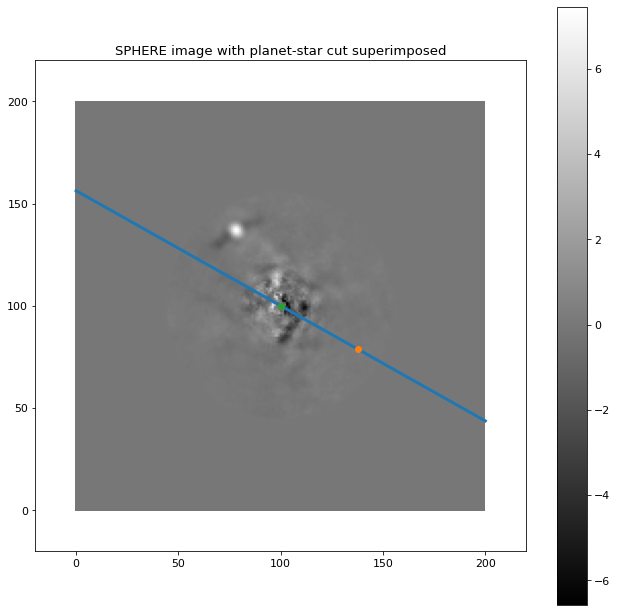

In [63]:
# plot the imshow & plt together 
plt.figure(figsize=(11,11)) 
plt.title('SPHERE image with planet-star cut superimposed')
plt.imshow(signalMatrix, cmap='gray', origin='upper') # 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic
plt.colorbar()
xComponent, m = inputCenter_outputPlot(Xcen, Ycen)
plt.show()

In [64]:
# this cell turns the (messy) plotting above code into a clean function 
def plot_signal_profile(wavelength_index, real_test_planet):
    if real_test_planet == 'real':
        UniqueBoxes = UniqueBoxesNP
    elif real_test_planet == 'test':
        UniqueBoxes = test_UniBoxNP
    else:
        print('error in plot signal profile function')

    DistanceFromStar = np.sqrt((UniqueBoxes[:,0] - 100)**2 + (UniqueBoxes[:,1] - 100)**2)
    # print(DistanceFromStar)
    for i in range(int(len(DistanceFromStar)/2)): #make half the line in a negative direction 
        DistanceFromStar[i] = (-1)*DistanceFromStar[i] 
    radius = np.delete(DistanceFromStar,-1)

    # print(image_data.shape)

    for i in range(200):
        for j in range(200):
            signalMatrix[i][j] = image_data[0][wavelength_index][i][j]

    signal = []
    for i in UniqueBoxes: # might need to define this 
        if i[0] <= 199.1 and i[1] < 199.1:
            signal.append(signalMatrix[i[0]][i[1]])
    return(radius, signal)

# plot the 39 detectors 

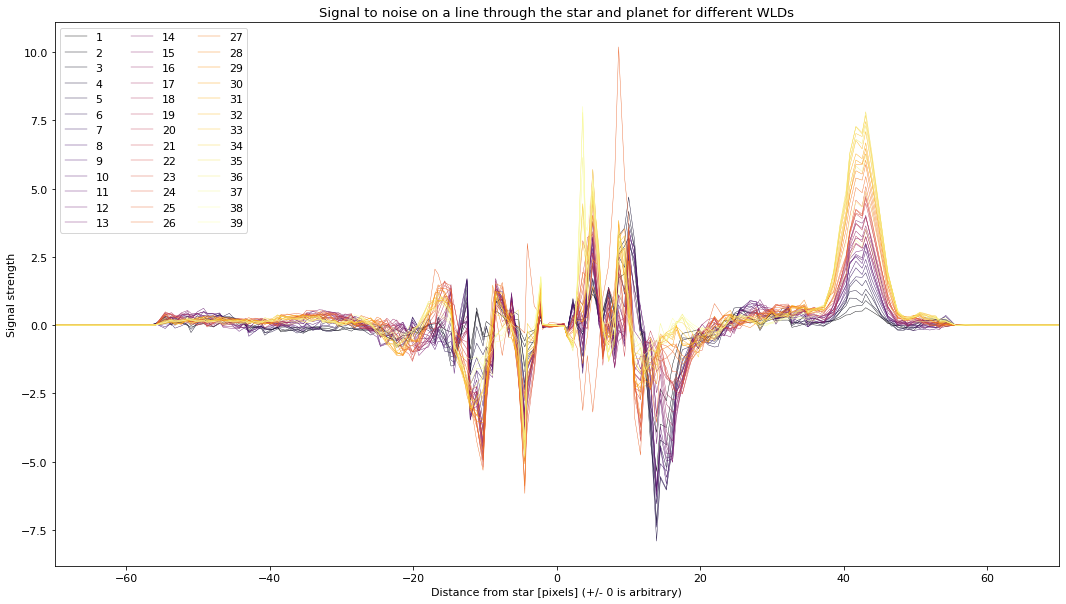

In [65]:
# this cell makes the above plot for all 39 wavelengths
wavelength_index = range(39)
n = max(wavelength_index)
plt.figure(figsize=(18,10))
for i in wavelength_index:
    rad, sig = plot_signal_profile(i, 'real')
    plt.plot(rad, sig, linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
plt.title('Signal to noise on a line through the star and planet for different WLDs')
plt.xlim(-70, 70)
plt.xlabel('Distance from star [pixels] (+/- 0 is arbitrary)')
plt.ylabel('Signal strength')
plt.legend(ncol=3)
plt.show()

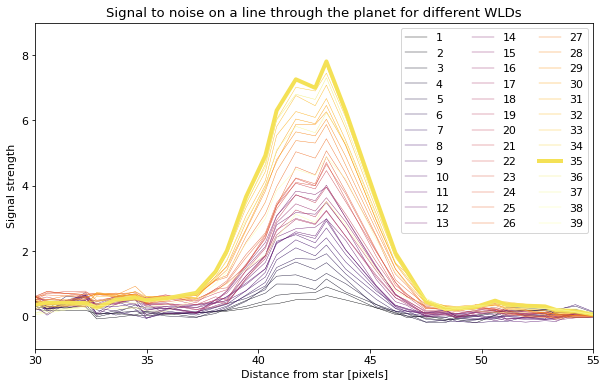

In [66]:
# Zoom in on the planet signal (hill) around 40 [pixels]
WLI_of_interest = 35 - 1 # leave the -1 for python's indexing
plt.figure(figsize=(10,6))
for i in wavelength_index:
    rad, sig = plot_signal_profile(i, 'real')
    if i != WLI_of_interest:
        plt.plot(rad, sig, linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
    else:
        plt.plot(rad, sig, linewidth=4, color=p(i/(n-1)), label=str(i+1))
plt.title('Signal to noise on a line through the planet for different WLDs')
plt.xlim(30, 55)
plt.ylim(-1, 9)
plt.xlabel('Distance from star [pixels]')
plt.ylabel('Signal strength')
plt.legend(ncol=3)
plt.show()

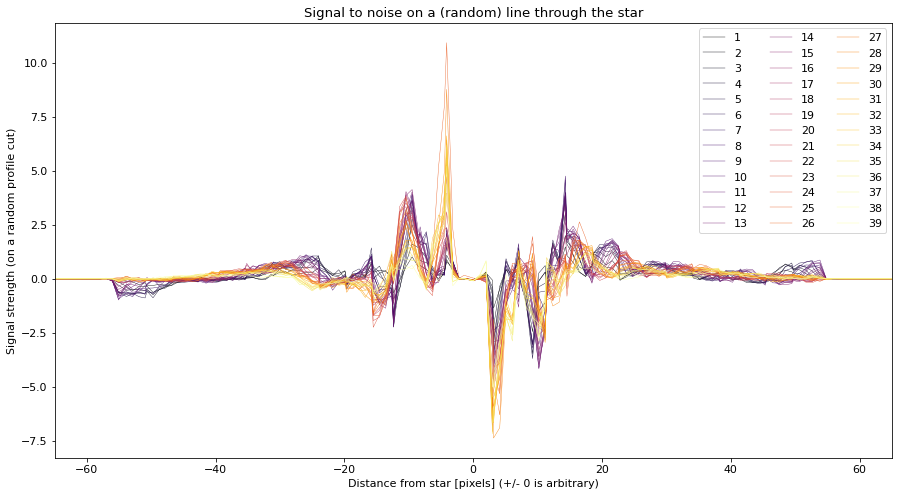

In [67]:
# plot the s/r through a random cut profile (with no planet) 
wavelength_index = range(39)
n = max(wavelength_index)
p = plt.get_cmap('inferno') 
plt.figure(figsize=(15,8))
for i in wavelength_index:
    rad, sig = plot_signal_profile(i, 'test')
    if len(sig) == len(rad)+1:
        sig = np.delete(sig,-1)
    plt.plot(rad, sig, linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
    # plt.plot(rad, sig, linewidth=0.4, color=p(i/(n-1)), label=i)
plt.title('Signal to noise on a (random) line through the star')
plt.xlim(-65, 65)
plt.xlabel('Distance from star [pixels] (+/- 0 is arbitrary)')
plt.ylabel('Signal strength (on a random profile cut)')
plt.legend(ncol=3)
plt.show()

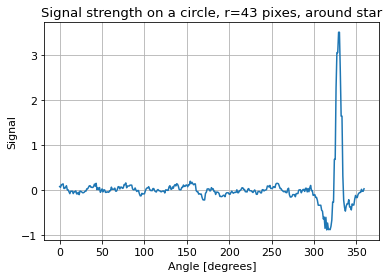

maximum occurs at: (array([329, 330]),)
329 and 330 are: 3.51292595402396 3.51292595402396
the format is such that the planet position is: 137.0500538989856 78.17585039268971


In [68]:
# Use brute force to find the angle between the zero axis and the planet; the planet is about 43 pixels away from 100,100
signal_at_43, x, y = [], [], []
degrees = range(360)
for i in degrees:
    x.append(100 + 43*np.cos(np.deg2rad(i)))
    y.append(100 + 43*np.sin(np.deg2rad(i)))
    signal_at_43.append(signalMatrix[round(x[i]), round(y[i])]) ###
# print(x), print(y)
plt.plot(degrees, signal_at_43)
plt.title('Signal strength on a circle, r=43 pixes, around star')
plt.xlabel('Angle [degrees]')
plt.ylabel('Signal')
plt.grid()
plt.show()
# the planet is 329-330 degrees 
print('maximum occurs at:', np.where(signal_at_43 == np.amax(signal_at_43)))
print('329 and 330 are:', signal_at_43[329], signal_at_43[330])
# Currently, there are repeated pixels in the circle of signal.. can remove extras, if important 
xPlanet = 100 + 43*np.cos(np.deg2rad(329.5))
yPlanet = 100 + 43*np.sin(np.deg2rad(329.5))
print('the format is such that the planet position is:', xPlanet, yPlanet) #This is what's inputted 

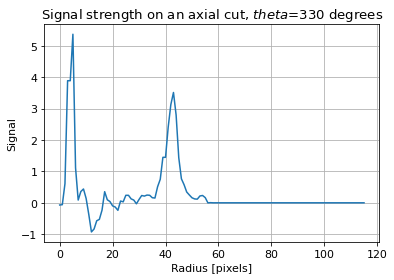

maximum occurs at: (array([43]),)
signal at point 43: 3.51292595402396
(the format is such that) the planet position is: 137.0500538989856 78.17585039268971


In [69]:
# This cell calculates and plots the above, except for radius instead of angle (at an angle of 329.5)
signal_along_330, x, y = [], [], []
points_of_line = range(200)
radial_step_size = 1
for i in points_of_line:
    x.append(100 + i*radial_step_size*np.cos(np.deg2rad(329.5)))
    y.append(100 + i*radial_step_size*np.sin(np.deg2rad(329.5)))
    if round(x[i]) > 199 or round(y[i]) > 199:
        break
    else:
        signal_along_330.append(signalMatrix[round(x[i]), round(y[i])])
points_of_line = points_of_line[0:len(signal_along_330)]
#print(x), print(y), print(len(points_of_line)), print(len(signal_along_330))
plt.plot(points_of_line, signal_along_330)
plt.title('Signal strength on an axial cut, $theta$=330 degrees')
plt.xlabel('Radius [pixels]')
plt.ylabel('Signal')
plt.grid()
plt.show()

# the planet is 329-330 degrees
planet_signal_along_330 = signal_along_330
for i in range(6):
    planet_signal_along_330[i] = 0
print('maximum occurs at:', np.where(planet_signal_along_330 == np.amax(planet_signal_along_330)))
print('signal at point 43:', signal_along_330[43])# , signal_at_43[330])
# Currently, there are repeated pixels in the circle of signal.. can remove extras, if important 
xPlanet = 100 + 43*radial_step_size*np.cos(np.deg2rad(329.5))
yPlanet = 100 + 43*radial_step_size*np.sin(np.deg2rad(329.5))
print('(the format is such that) the planet position is:', xPlanet, yPlanet)

#This ends the research code above; and begins coding notes below

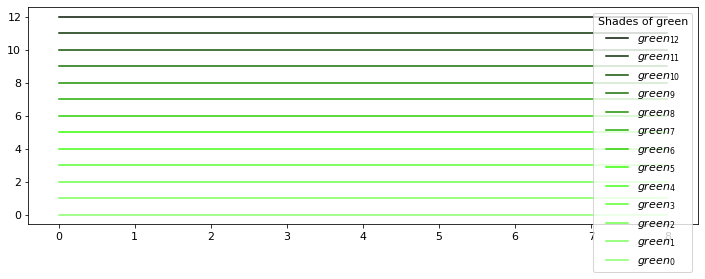

In [70]:
# Plot the gradations of green colors
fig = plt.figure(figsize = (12, 4))
ax = fig.add_subplot(1, 1, 1)
a = np.empty(9)
for i in range(len(greens)):
    for j in range(len(a)):
        a[j] = i
    ax.plot(range(9), a, color=greens[i], label='$green_{'+str(i)+'}$')
handles, labels = ax.get_legend_handles_labels() # This line flips the order of the legend, so it aligns with the plot's colors ###
plt.legend(handles[::-1], labels[::-1], title='Shades of green', loc='upper right') # same as line above

In [71]:
'''        The Code Appendix

# Sven's imshow code recommendation (for good/simple plots)
fig, axs = plt.subplot((4,4), ....)
axs[0, 0].imshow(....)
axs[0, 0].cbar....
axs[0, 1].imshow(....)





#mat_file = 'test_mat.mat'
# Now load in the data from the .mat that was just saved
#df = scipy.io.loadmat(mat_file)
# And just to check if the data is the same:  
#assert np.all(mat_file == matdata['out'])
#df = pd.read_table(path+file, header=None, delimiter='\t') # the numerical values are all of the "signal_to_noise"s
#df.to_csv(path+'SNR.csv', sep=' ')  
#for j in df:
    #print('j is: ', j)
    #dfNew = [i.split(' ', 999) for i in df]
    #dfNew = [i.split(' ', 999)[0] for i in j]
#print(dfNew)

    If good, turn the line above into an if statement (and the if statement into a function)
if df2[0][0][0] == '(' or df2[0][0][0] == ')':
    PCAs1 = df2[0][0][1]
else:
    PCAs1 = df2[0][0][0]


#plt.figure(figsize = (20, 6))
#ax = fig.add_subplot(3, 1, 1)


for i in range(PCAs1):
    for j in range(PCAs2):
        for k in range(wavelength_index):
            print(k)
            if j < 3:
                SN_table[i, j, k] = df[j][k]
            elif j == 4 or j == 5 or j == 6:
                SN_table[i, j, k] = df[j+1][k]
            elif j == 4 or j == 5 or j == 6:
                SN_table[i, j, k] = df[j+2][k]
            else:
                True
   
built_element = '' # or []? 
            if df[i][j][k] not in bad_character:   #if the character is a number
                if SN_table[i, j, k] == 0:
                    print(k)
                    print(df[i][j][k])
                    built_element = df[i][j][k]     #(unless it's the first character)
                else:
                    built_element.append(df[i][j][k])    #add it
            print('built_element is:', built_element)
            SN_table[i, j, k] = float(built_element)


for i in range(11): # 11 columns in the file
    for k in range(39): # 39 rows in the file
        if i == 0 or i == 1 or i == 2:
            SN_table[i, 0, k] = df[i][k]
        elif i == 4 or i == 5 or i == 6:
            SN_table[i-4, 1, k] = df[i][k]
        elif i == 8 or i == 9 or i == 10:
            SN_table[i-8, 2, k] = df[i][k]
        #else:
            #print('i != 0,1,2, 4,5,6, 8,9,10')
print(SN_table[0][0])




####################################################################
# sns heatmap code (use the imshow unless that's impossible)
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data, linewidth=0.5)
plt.show()
####################################################################
df = pd.DataFrame(np.random.random((4,4)))
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]))
vmin = min(df.values.min(), df2.values.min())
vmax = max(df.values.max(), df2.values.max())
fig, axs = plt.subplots(nrows=2, ncols=3, gridspec_kw=dict(width_ratios=[4,4,0.4]))
sns.heatmap(df, annot=True, cbar=False, ax=axs[0,0], vmin=vmin)
sns.heatmap(df, annot=True, cbar=False, ax=axs[0,1], vmin=vmin)
sns.heatmap(df2, annot=True, yticklabels=False, cbar=False, ax=axs[1,0], vmax=vmax)
sns.heatmap(df2, annot=True, yticklabels=False, cbar=False, ax=axs[1,1], vmax=vmax)
#fig.colorbar(axs[1].collections[0], cax=axs[2]) #works with 1x2, but not 2x2
plt.show()
####################################################################




'''

'        The Code Appendix\n\n# Sven\'s imshow code recommendation (for good/simple plots)\nfig, axs = plt.subplot((4,4), ....)\naxs[0, 0].imshow(....)\naxs[0, 0].cbar....\naxs[0, 1].imshow(....)\n\n\n\n\n\n#mat_file = \'test_mat.mat\'\n# Now load in the data from the .mat that was just saved\n#df = scipy.io.loadmat(mat_file)\n# And just to check if the data is the same:  \n#assert np.all(mat_file == matdata[\'out\'])\n#df = pd.read_table(path+file, header=None, delimiter=\'\t\') # the numerical values are all of the "signal_to_noise"s\n#df.to_csv(path+\'SNR.csv\', sep=\' \')  \n#for j in df:\n    #print(\'j is: \', j)\n    #dfNew = [i.split(\' \', 999) for i in df]\n    #dfNew = [i.split(\' \', 999)[0] for i in j]\n#print(dfNew)\n\n    If good, turn the line above into an if statement (and the if statement into a function)\nif df2[0][0][0] == \'(\' or df2[0][0][0] == \')\':\n    PCAs1 = df2[0][0][1]\nelse:\n    PCAs1 = df2[0][0][0]\n\n\n#plt.figure(figsize = (20, 6))\n#ax = fig.add_su